In [118]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar CSV**

In [285]:
#Cargamos el csv con pandas y visualizamos las primeras filas del dataframe obtenido
df = pd.read_csv("df_trans.csv")
print(df.shape)
df.head()

(374, 16)


,top,track_name,track_popularity,duration_ms,artist_name,artist_genres,artist_popularity,feats,explicit,album,type,relase_date,track_id,artist_id,list,duracion_mins_segs
0,1,no tiene sentido,93,158036,Beéle,"['latin afrobeats', 'reggaeton', 'pop urbano']",93,NaN,False,BORONDO,album,2025-05-15,1HEwEN64NjgTaHmo7LfkX8,7a0XAaPaK2aDSqa8p3QnC7,Los 40 Principales,2:38
1,2,ordinary,96,186964,Alex Warren,NaN,90,NaN,False,Ordinary,single,2025-02-07,6qqrTXSdwiJaq8SO0X2lSe,0fTSzq9jAh4c36UVb4V7CB,Los 40 Principales,3:06
2,3,6 de febrero,75,175584,Aitana,NaN,80,NaN,False,6 DE FEBRERO,single,2025-05-05,2TCUMmklsJTLWHnoU4mSQ4,7eLcDZDYHXZCebtQmVFL25,Los 40 Principales,2:55
3,4,blackout 🧊,84,182282,Emilia,['argentine trap'],80,"TINI, Nicki Nicole",False,blackout 🧊,single,2025-03-25,2efbgTtEGNpsUZaOfgRTR6,0AqlFI0tz2DsEoJlKSIiT9,Los 40 Principales,3:02
4,5,apt.,94,169917,ROSÉ,['k-pop'],85,Bruno Mars,False,APT.,single,2024-10-18,5vNRhkKd0yEAg8suGBpjeY,3eVa5w3URK5duf6eyVDbu9,Los 40 Principales,2:49


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   top                 374 non-null    int64 
 1   track_name          374 non-null    object
 2   track_popularity    374 non-null    int64 
 3   duration_ms         374 non-null    int64 
 4   artist_name         374 non-null    object
 5   artist_genres       185 non-null    object
 6   artist_popularity   374 non-null    int64 
 7   feats               134 non-null    object
 8   explicit            374 non-null    bool  
 9   album               374 non-null    object
 10  type                374 non-null    object
 11  relase_date         374 non-null    object
 12  track_id            374 non-null    object
 13  artist_id           374 non-null    object
 14  list                374 non-null    object
 15  duracion_mins_segs  374 non-null    object
dtypes: bool(1), int64(4), obje

**Porcentaje de canciones por lista**

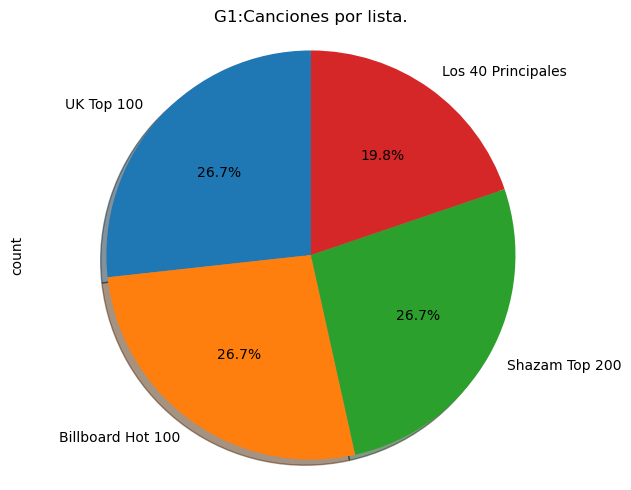

In [ ]:
clase_n=df["list"].value_counts() #Extraemos cuantas veces se repite cada lista con la columna list

#Pie plot
clase_n.plot.pie(y=df.index,
           shadow=True,
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.title("G1:Canciones por lista.")
plt.show()

**Artistas más populares**

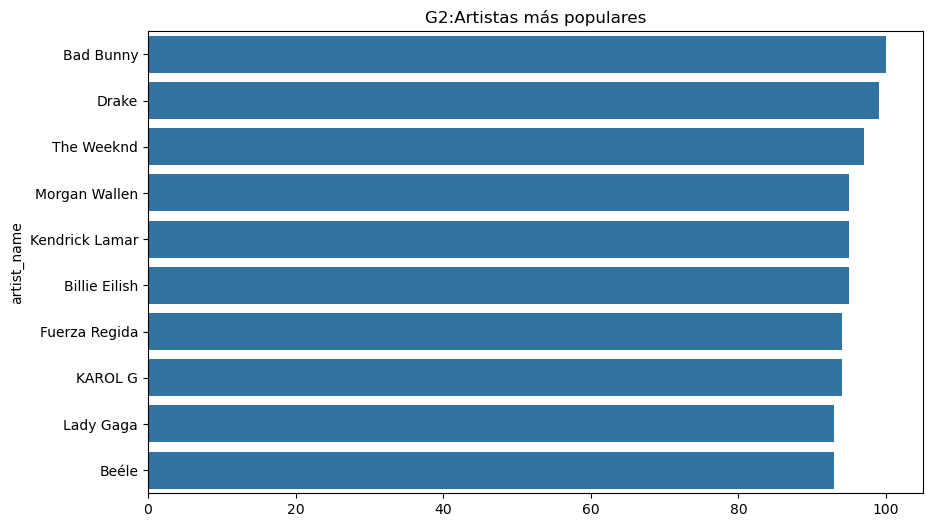

In [288]:
top_artistas = df.groupby("artist_name")["artist_popularity"].mean().sort_values(ascending=False).head(10) #Extraemos los 10 artistas populares en general mediante el valor artist_popularity

plt.figure(figsize=(10, 6))
#Barplot de los artistas respecto a su popularidad
sns.barplot(x=top_artistas.values, y=top_artistas.index)
plt.title("G2:Artistas más populares")

plt.show()

**Canción mas popular de cada lista**

In [294]:
top_1=df[df["top"] == 1] #Vemos cual tiene el valor 1 de la columna top que tienía la posicion de la cancion en la lista de exitos
top_1

,top,track_name,track_popularity,duration_ms,artist_name,artist_genres,artist_popularity,feats,explicit,album,type,relase_date,track_id,artist_id,list,duracion_mins_segs
0,1,no tiene sentido,93,158036,Beéle,"['latin afrobeats', 'reggaeton', 'pop urbano']",93,NaN,False,BORONDO,album,2025-05-15,1HEwEN64NjgTaHmo7LfkX8,7a0XAaPaK2aDSqa8p3QnC7,Los 40 Principales,2:38
74,1,dior,85,169159,MK,['house'],73,Chrystal,False,Dior (feat. Chrystal),single,2025-06-06,6PTgSuFz9JqQ1o0jTYOuvX,1yqxFtPHKcGcv6SXZNdyT9,UK Top 100,2:49
174,1,ordinary,96,186964,Alex Warren,NaN,90,NaN,False,Ordinary,single,2025-02-07,6qqrTXSdwiJaq8SO0X2lSe,0fTSzq9jAh4c36UVb4V7CB,Billboard Hot 100,3:06
274,1,i adore you,91,214000,HUGEL,"['latin house', 'afro house', 'techengue']",83,"Topic, Arash, Daecolm",False,I Adore You (feat. Daecolm),single,2024-07-19,5nPbKG04fhLkIAjcPFaZq7,5PlfkPxwCpRRWQJBxCa0By,Shazam Top 200,3:34


Text(0.5, 1.0, 'G3:Canciones más popular en cada lista.')

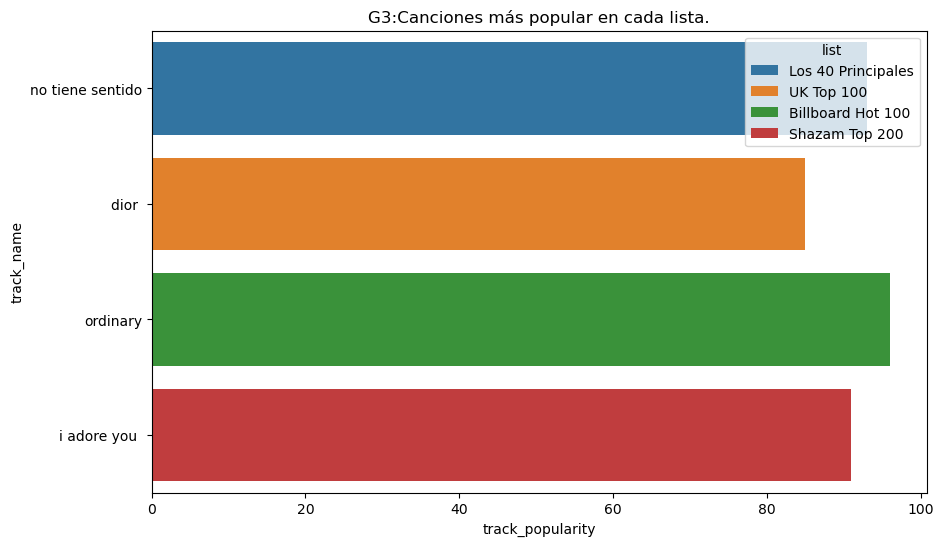

In [293]:
#Barplot de la popularidad de la cancion para cada una de las canciones en el puesto 1
plt.figure(figsize=(10, 6))
sns.barplot(x=top_1['track_popularity'], y=top_1["track_name"], hue=top_1['list'])
plt.title("G3:Canciones más popular en cada lista.")

**Artist popularity vs track popularity**

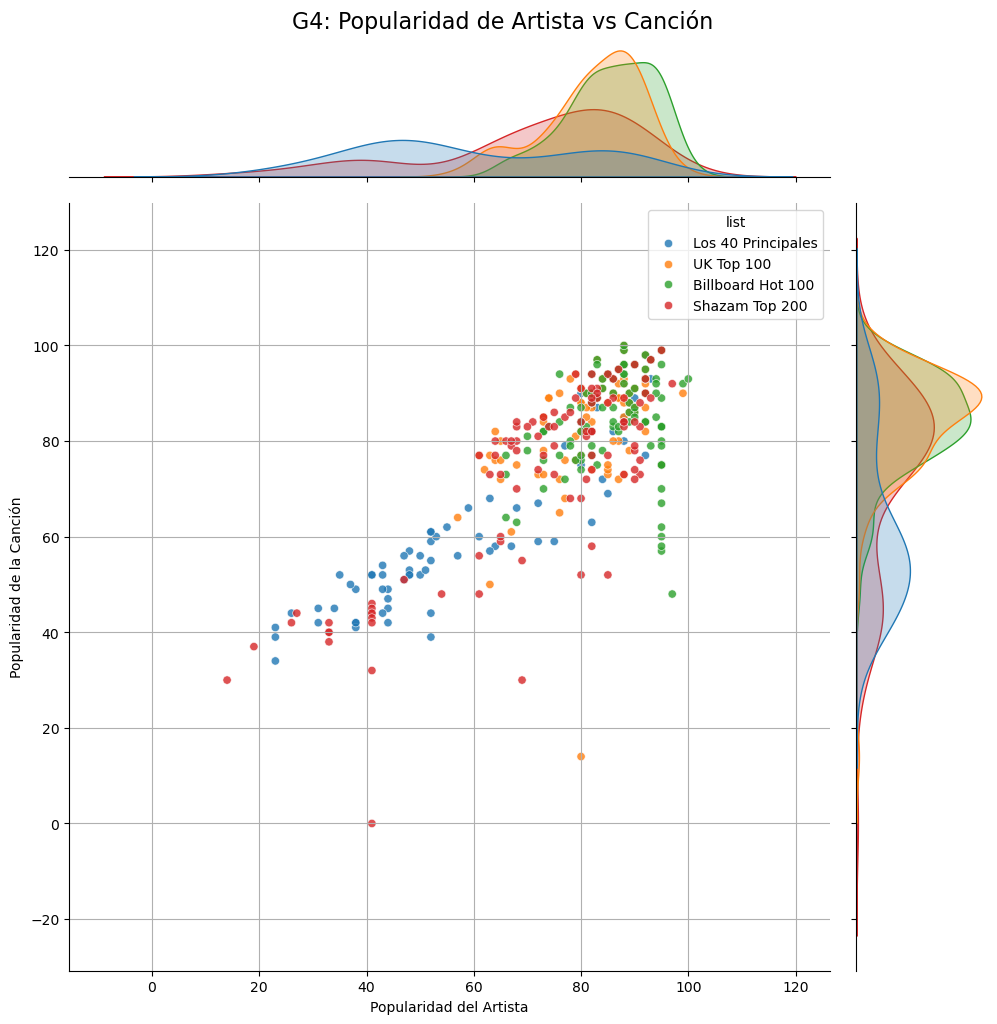

In [ ]:
g=sns.jointplot(data=df, x="artist_popularity", y="track_popularity", hue="list", alpha=0.8, height=10) #Scatterplot que muestra la popularidad del artista frente a la de la canción y el color depende de la lista en la que está contenida
g.figure.suptitle("G4: Popularidad de Artista vs Canción", y=1.02, fontsize=16)
plt.xlabel("Popularidad del Artista")
plt.ylabel("Popularidad de la Canción")
plt.grid(True)
plt.show()

**Distribucion popularidad por lista**

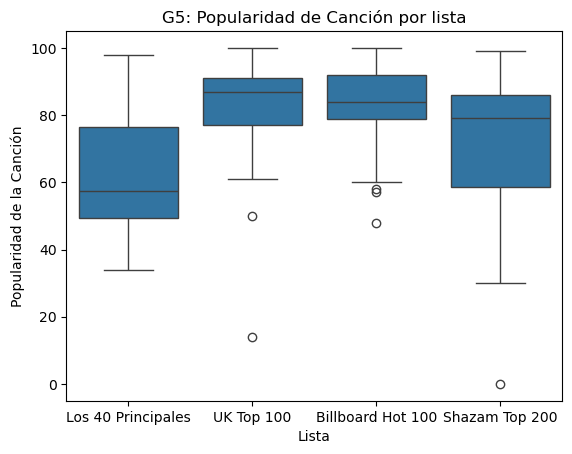

In [312]:
sns.boxplot(x='list', y='track_popularity', data=df) #Boxplot de la popularidad de las canciones en cada lista

plt.title("G5: Popularidad de Canción por lista")
plt.ylabel("Popularidad de la Canción")
plt.xlabel("Lista")

plt.show()

**Distribucion popularidad artistas**

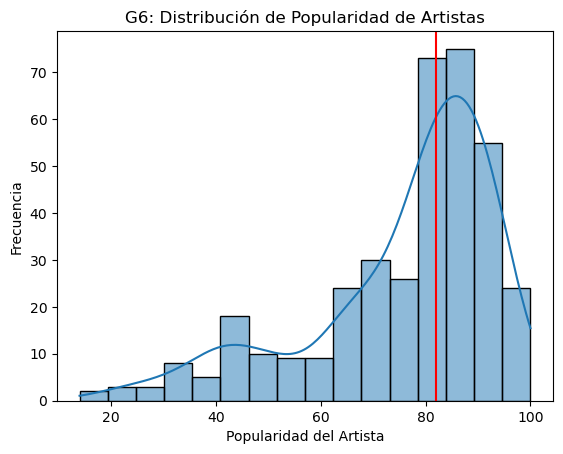

In [314]:
sns.histplot(df["artist_popularity"], kde = True) #histograma de la popularidad de los artitas
plt.axvline(x=df['artist_popularity'].median(), color='red') #Mediana de la popularidad de los artistas en rojo
plt.title('G6: Distribución de Popularidad de Artistas')
plt.xlabel('Popularidad del Artista')
plt.ylabel('Frecuencia')

plt.show()

**Distribucion de la popularidad de los artistas por lista**

In [317]:
subset_40=df[df["list"].isin(["Los 40 Principales"])] #Hacemos subsets del dataframe original con cada una de las listas por separado
subset_BB=df[df["list"].isin(["Billboard Hot 100"])]
subset_Sz=df[df["list"].isin(["Shazam Top 200"])]
subset_UK=df[df["list"].isin(["UK Top 100"])]

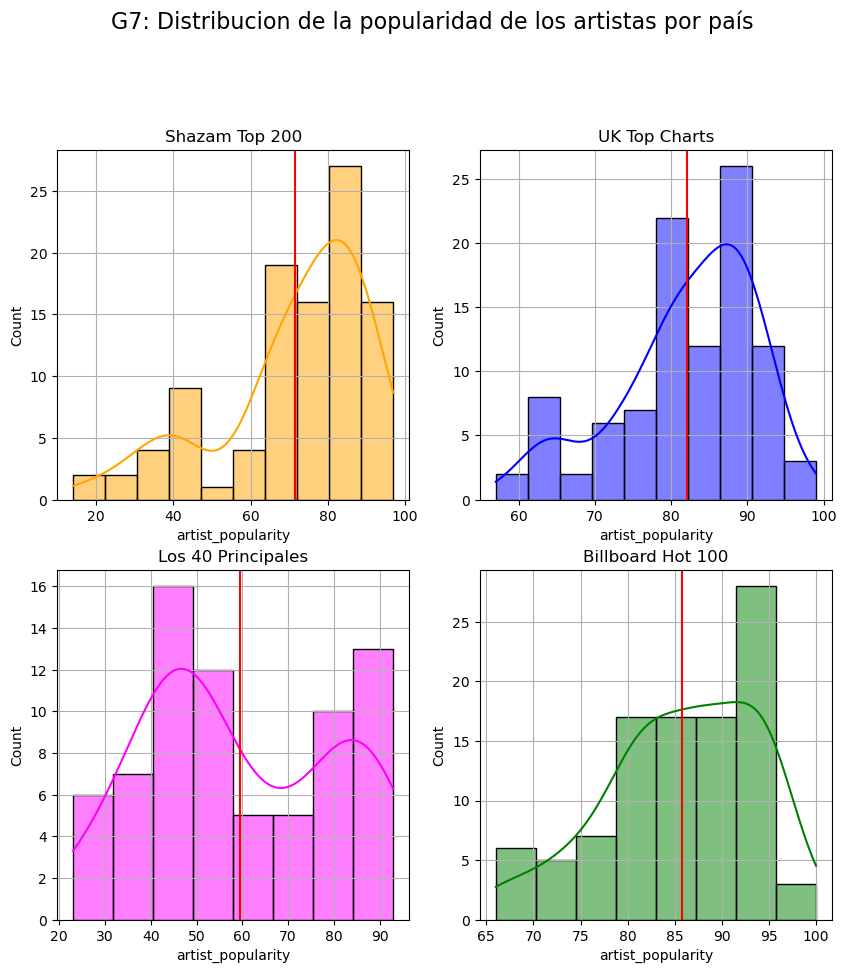

In [318]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
plt.suptitle("G7: Distribucion de la popularidad de los artistas por país", fontsize=16, y=1.02)

plt.subplot(2,2,3)
sns.histplot(subset_40['artist_popularity'], color = "magenta", kde = True)
plt.axvline(x=subset_40['artist_popularity'].mean(), color='red')
plt.title("Los 40 Principales")
plt.grid()

plt.subplot(2,2,4)
sns.histplot(subset_BB['artist_popularity'], color = "green", kde = True)
plt.axvline(x=subset_BB['artist_popularity'].mean(), color='red')
plt.title("Billboard Hot 100")
plt.grid()

plt.subplot(2,2,1)
sns.histplot(subset_Sz['artist_popularity'], color = "orange", kde = True)
plt.axvline(x=subset_Sz['artist_popularity'].mean(), color='red')
plt.title("Shazam Top 200")
plt.grid()

plt.subplot(2,2,2)
sns.histplot(subset_UK['artist_popularity'], color = "blue", kde = True)
plt.axvline(x=subset_UK['artist_popularity'].mean(), color='red')
plt.title("UK Top Charts")
plt.grid()

plt.show()

**Cantidad de feats**

Text(0.5, 1.0, 'G8: Canciones con colaboraciones en cada lista')

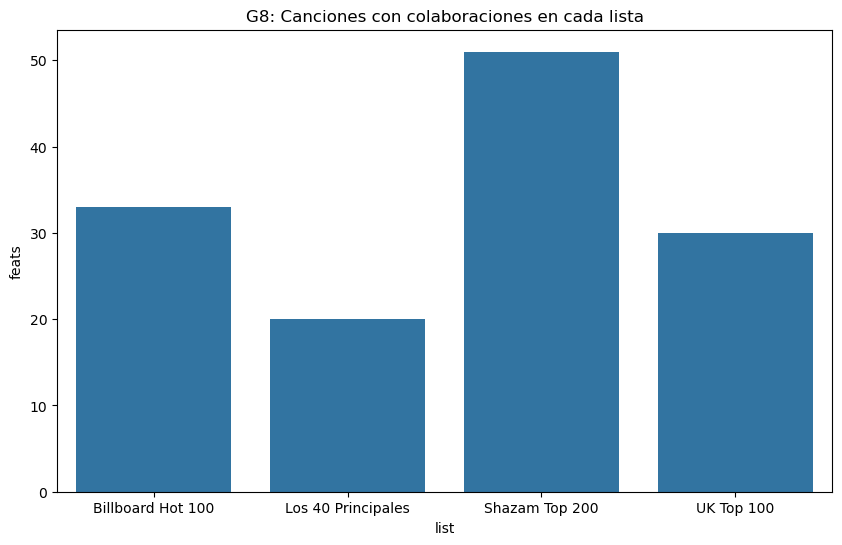

In [321]:
df1=df.groupby(by='list').aggregate({'feats':'count','track_name':'count'}) #Agrupamos por listas para ver cuantas canciones contienen colaboraciones
plt.figure(figsize=(10, 6))
sns.barplot(x=df1.index, y=df1["feats"])
plt.title('G8: Canciones con colaboraciones en cada lista')

**Duracion por lista**

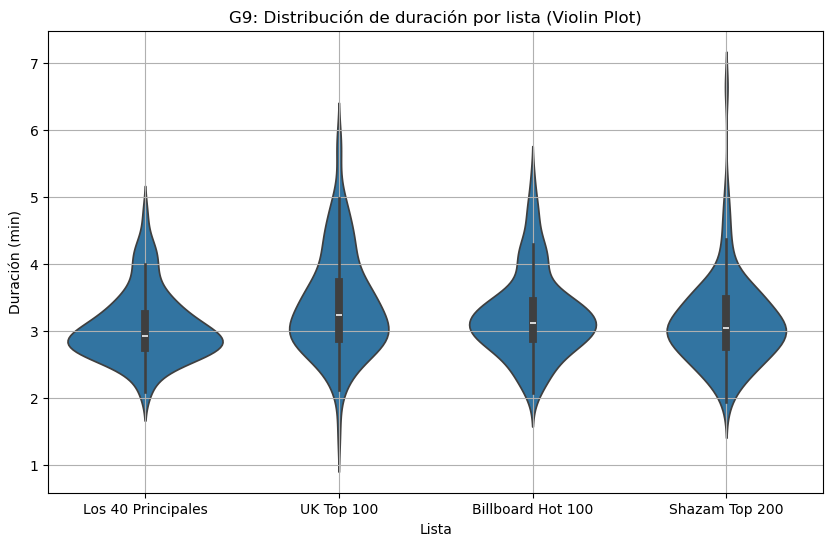

In [322]:
df["duracion_min"] = df["duration_ms"] / 60000 #Pasamos los milisegundos a minutos

plt.figure(figsize=(10, 6))
sns.violinplot(x="list", y="duracion_min", data=df) #Violin plot de la duracion de las canciones en cada una de las listas

plt.xlabel("Lista")
plt.ylabel("Duración (min)")
plt.title("G9: Distribución de duración por lista (Violin Plot)")
plt.grid(True)
plt.show()

**Géneros más representados en las listas**

In [ ]:
df_exp = pd.read_csv("genres_exploded.csv") #Hacemos un dataframe con el de CSV en el que explotamos los generos contenidos en listas en la columna artist_genres
print(df.shape)
df.head()

(526, 16)


,top,track_name,track_popularity,duration_ms,artist_name,artist_genres,artist_popularity,feats,explicit,album,type,relase_date,track_id,artist_id,list,duracion_mins_segs
0,1,no tiene sentido,93,158036,Beéle,latin afrobeats,93,NaN,False,BORONDO,album,2025-05-15,1HEwEN64NjgTaHmo7LfkX8,7a0XAaPaK2aDSqa8p3QnC7,Los 40 Principales,2:38
1,1,no tiene sentido,93,158036,Beéle,reggaeton,93,NaN,False,BORONDO,album,2025-05-15,1HEwEN64NjgTaHmo7LfkX8,7a0XAaPaK2aDSqa8p3QnC7,Los 40 Principales,2:38
2,1,no tiene sentido,93,158036,Beéle,pop urbano,93,NaN,False,BORONDO,album,2025-05-15,1HEwEN64NjgTaHmo7LfkX8,7a0XAaPaK2aDSqa8p3QnC7,Los 40 Principales,2:38
3,2,ordinary,96,186964,Alex Warren,NaN,90,NaN,False,Ordinary,single,2025-02-07,6qqrTXSdwiJaq8SO0X2lSe,0fTSzq9jAh4c36UVb4V7CB,Los 40 Principales,3:06
4,3,6 de febrero,75,175584,Aitana,NaN,80,NaN,False,6 DE FEBRERO,single,2025-05-05,2TCUMmklsJTLWHnoU4mSQ4,7eLcDZDYHXZCebtQmVFL25,Los 40 Principales,2:55


In [ ]:
greatest_g=df_exp["artist_genres"].value_counts().head(5) #Extraemos los 5 generos mas repetidos 
greatest_g

artist_genres
country         27
k-pop           19
house           13
flamenco pop    10
edm              9
Name: count, dtype: int64

Text(0.5, 1.0, 'G10: Distribución la popularidad de las canciones por lista y género')

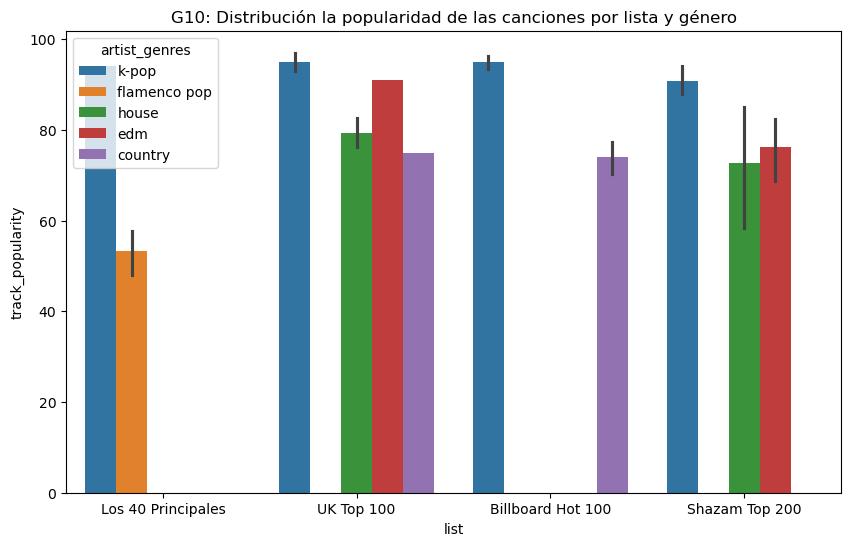

In [323]:
df_top_genres = df_exp[df_exp["artist_genres"].isin(greatest_g.index)] #Representamos la presencia de los géneros más frecuentes en cada una de las listas

#Barplot de la popularidad de las canciones por género y lista
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_genres, x="list", y="track_popularity", hue="artist_genres")
plt.title("G10: Distribución la popularidad de las canciones por lista y género")


**Géneros por país**

In [ ]:
genres_40=df_exp[df_exp["list"].isin(["Los 40 Principales"])] #Hacemos subsets de cada una de las listas de dataframe con los géneros explotados
genres_BB=df_exp[df_exp["list"].isin(["Billboard Hot 100"])]
genres_Sz=df_exp[df_exp["list"].isin(["Shazam Top 200"])]
genres_UK=df_exp[df_exp["list"].isin(["UK Top 100"])]

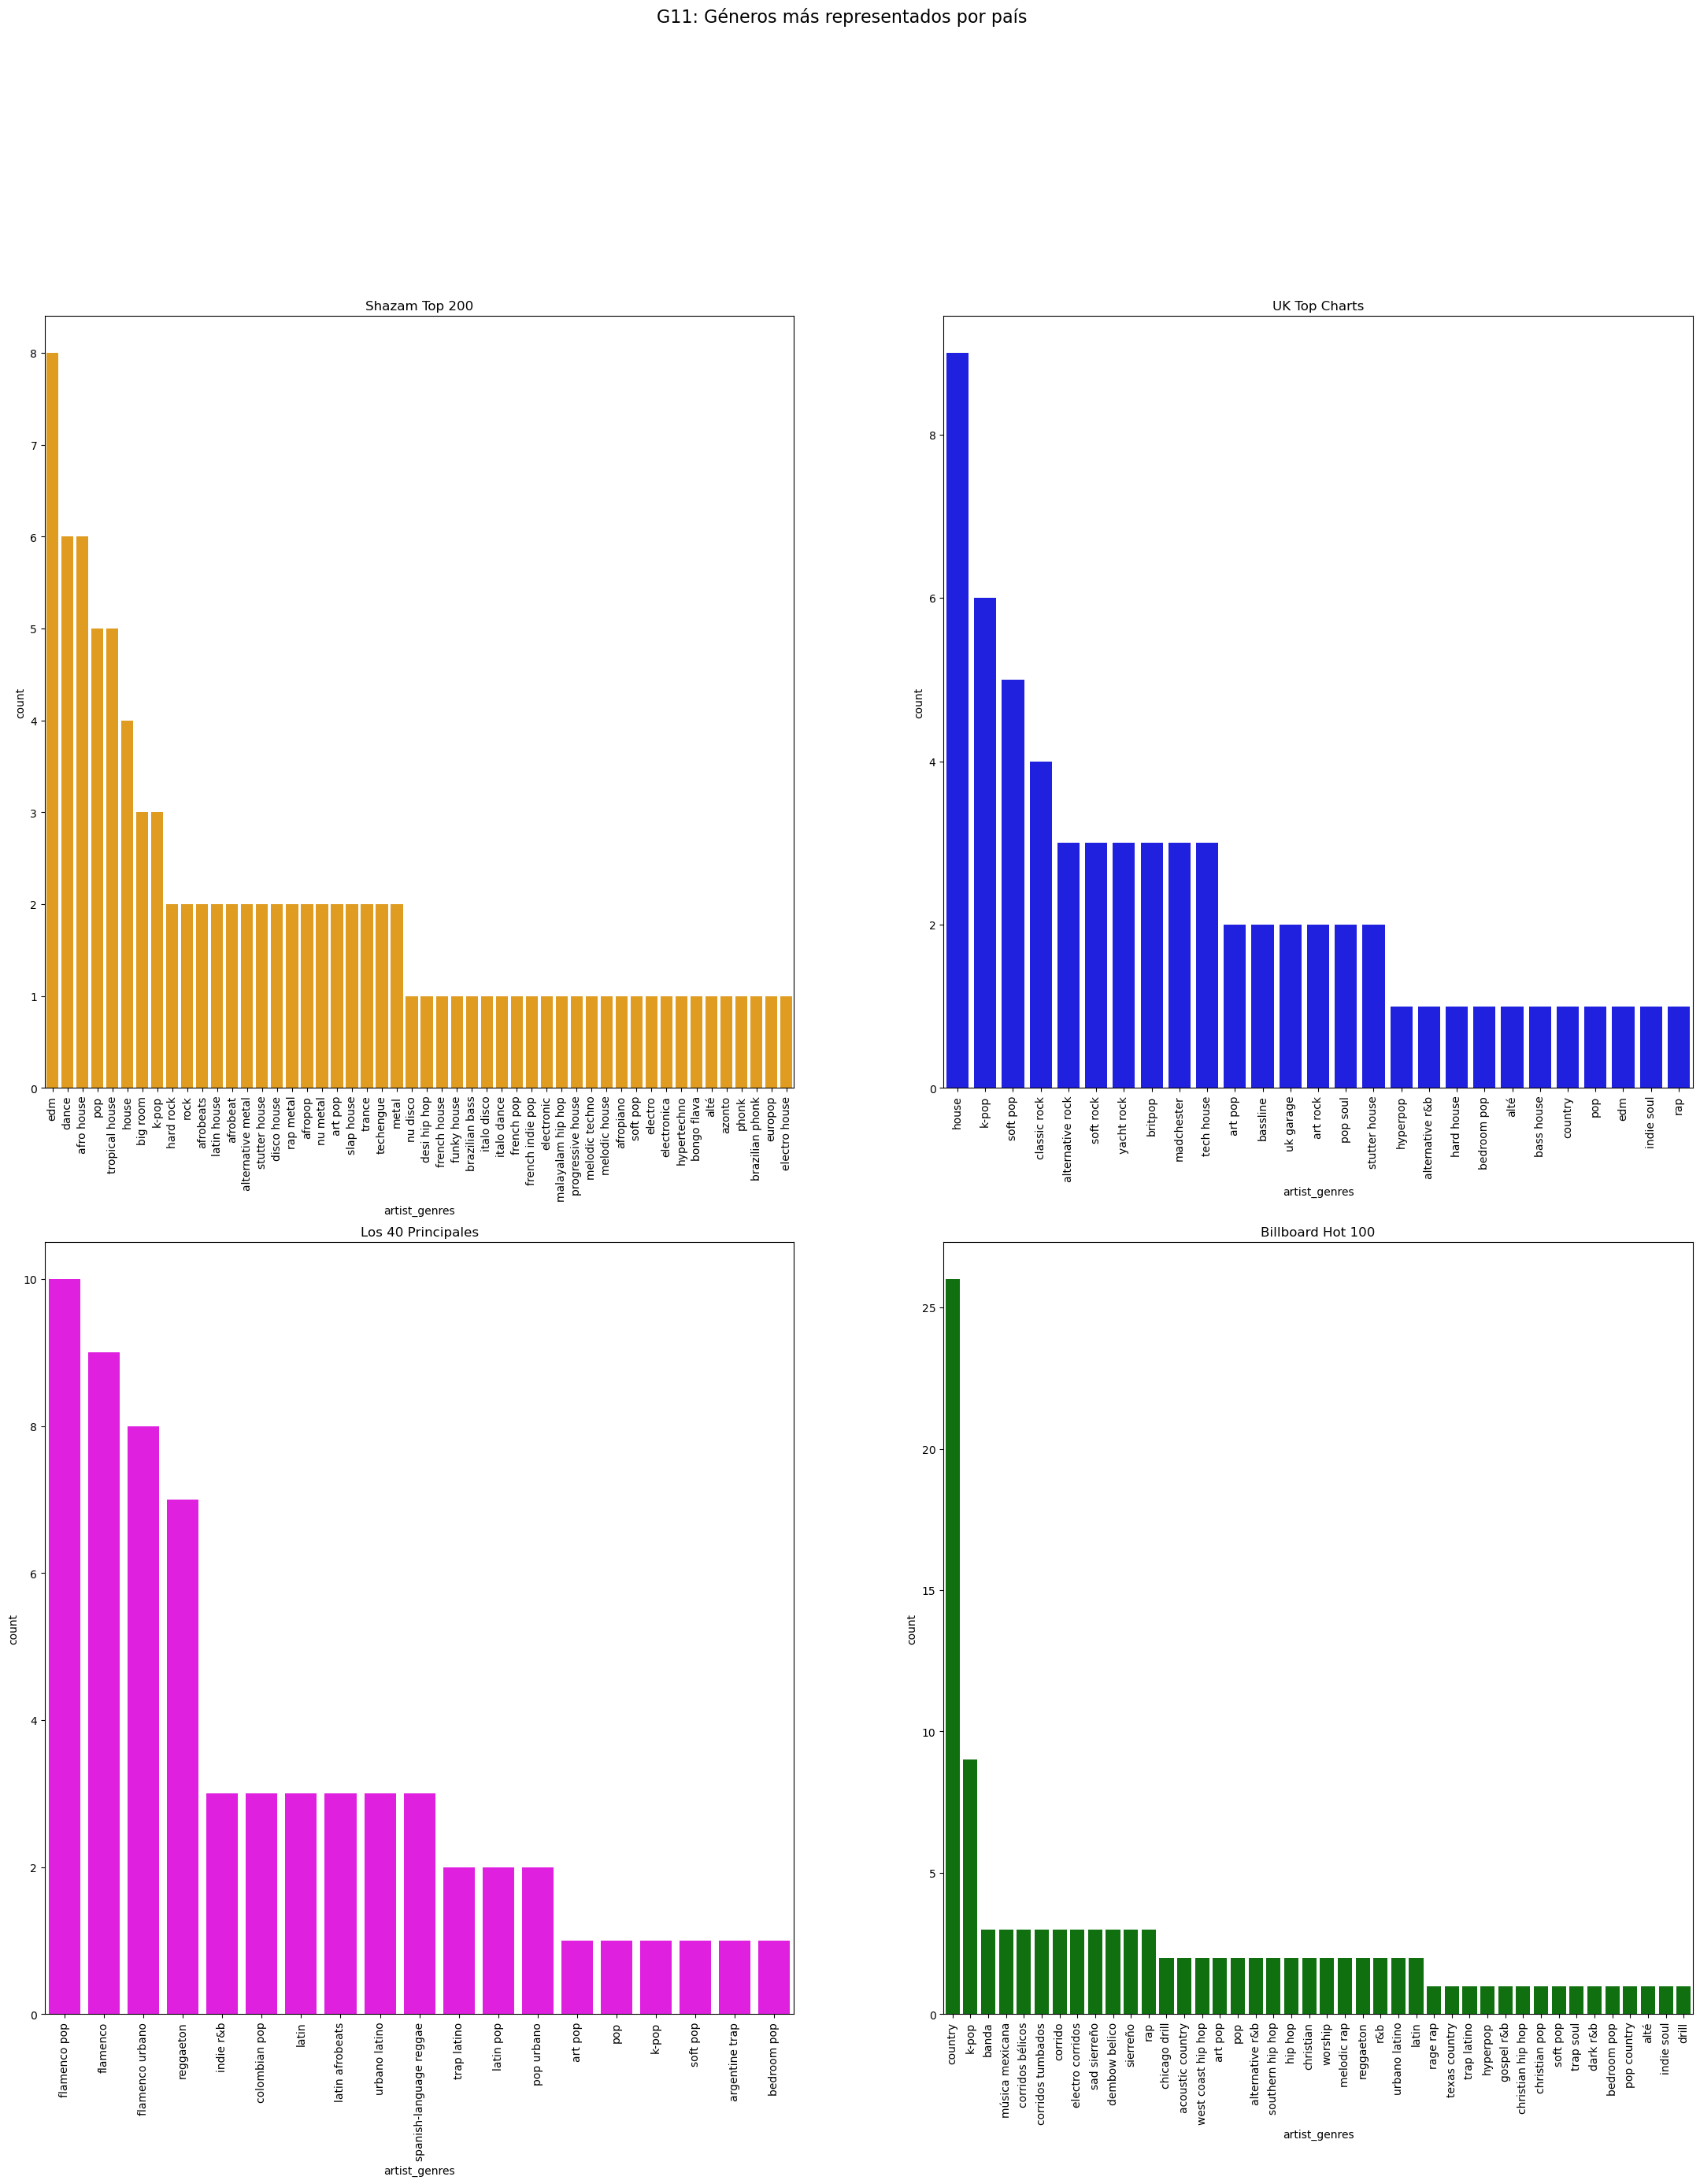

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (27, 28))
plt.suptitle("G11: Géneros más representados por país", fontsize=16, y=1.02)

#Representamos los subprots de los géneros más representados en cada una de las listas
plt.subplot(2,2,3)
sns.countplot(data=genres_40, x="artist_genres",color="magenta",order=genres_40["artist_genres"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Los 40 Principales")

plt.subplot(2,2,4)
sns.countplot(data=genres_BB, x="artist_genres",color = "green",order=genres_BB["artist_genres"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Billboard Hot 100")

plt.subplot(2,2,1)
sns.countplot(data=genres_Sz, x="artist_genres",color = "orange",order=genres_Sz["artist_genres"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Shazam Top 200")

plt.subplot(2,2,2)
sns.countplot(data=genres_UK, x="artist_genres",color = "blue",order=genres_UK["artist_genres"].value_counts().index)
plt.xticks(rotation=90)
plt.title("UK Top Charts")

plt.show()

**Canciones más repetidas entre listas**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'apt.'),
  Text(1, 0, 'that’s so true'),
  Text(2, 0, 'die with a smile'),
  Text(3, 0, 'messy'),
  Text(4, 0, 'azizam'),
  Text(5, 0, 'ordinary'),
  Text(6, 0, 'espresso'),
  Text(7, 0, 'birds of a feather'),
  Text(8, 0, 'anxiety'),
  Text(9, 0, 'nice to meet you')])

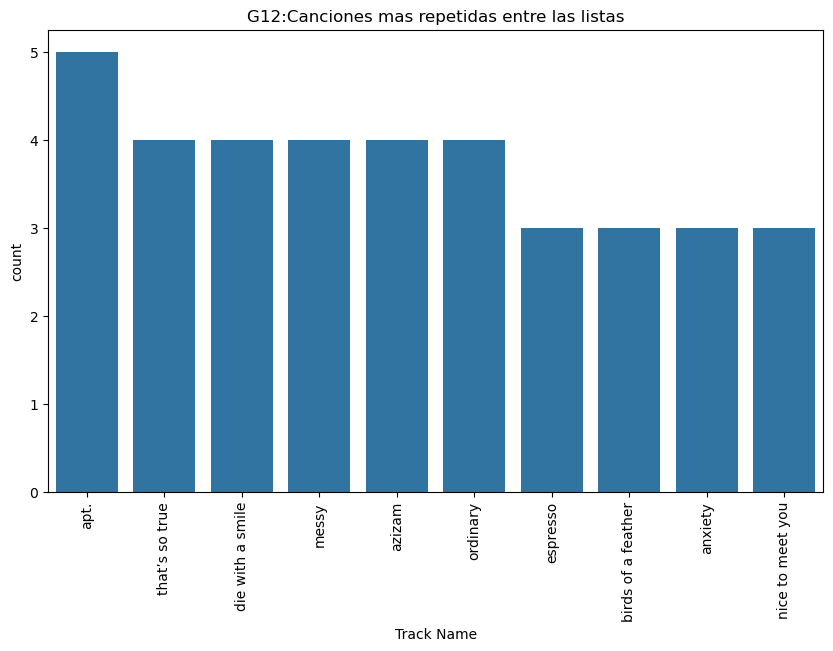

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="track_name", data=df, order=df["track_name"].value_counts().index[:10]) #Countplot de las 10 canciones más veces en el df
plt.title("G12:Canciones mas repetidas entre las listas")
plt.xlabel("Track Name")
plt.xticks(rotation=90)

**Artistas más representados**

In [ ]:
artistas=[] #Extraemos todos los artistas en una lista y los artistas que estan en las colaboraciones teniendo en cuenta que puede haber más de un artista por fila en esta columna
for i in df['artist_name']:
    artistas.append(i)
for i in df[df['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas.append(i)

Text(0.5, 1.0, 'G13:Artistas más repetidos teniendo en cuenta los feats')

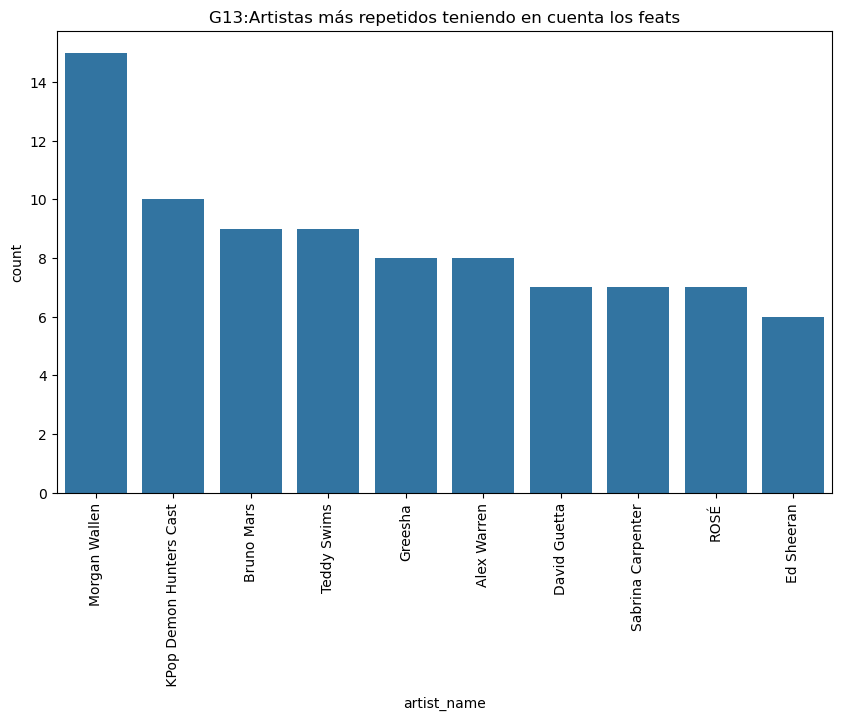

In [348]:
plt.figure(figsize=(10, 6))
df_artistas=pd.DataFrame()
df_artistas["artist_name"]=artistas
#Countplot de los 10 artistas más representados en las listas ya sea artista principal o colaboración
sns.countplot(data=df_artistas, x="artist_name", order=df_artistas["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("G13:Artistas más repetidos teniendo en cuenta los feats")

**Artista más repetido por lista**

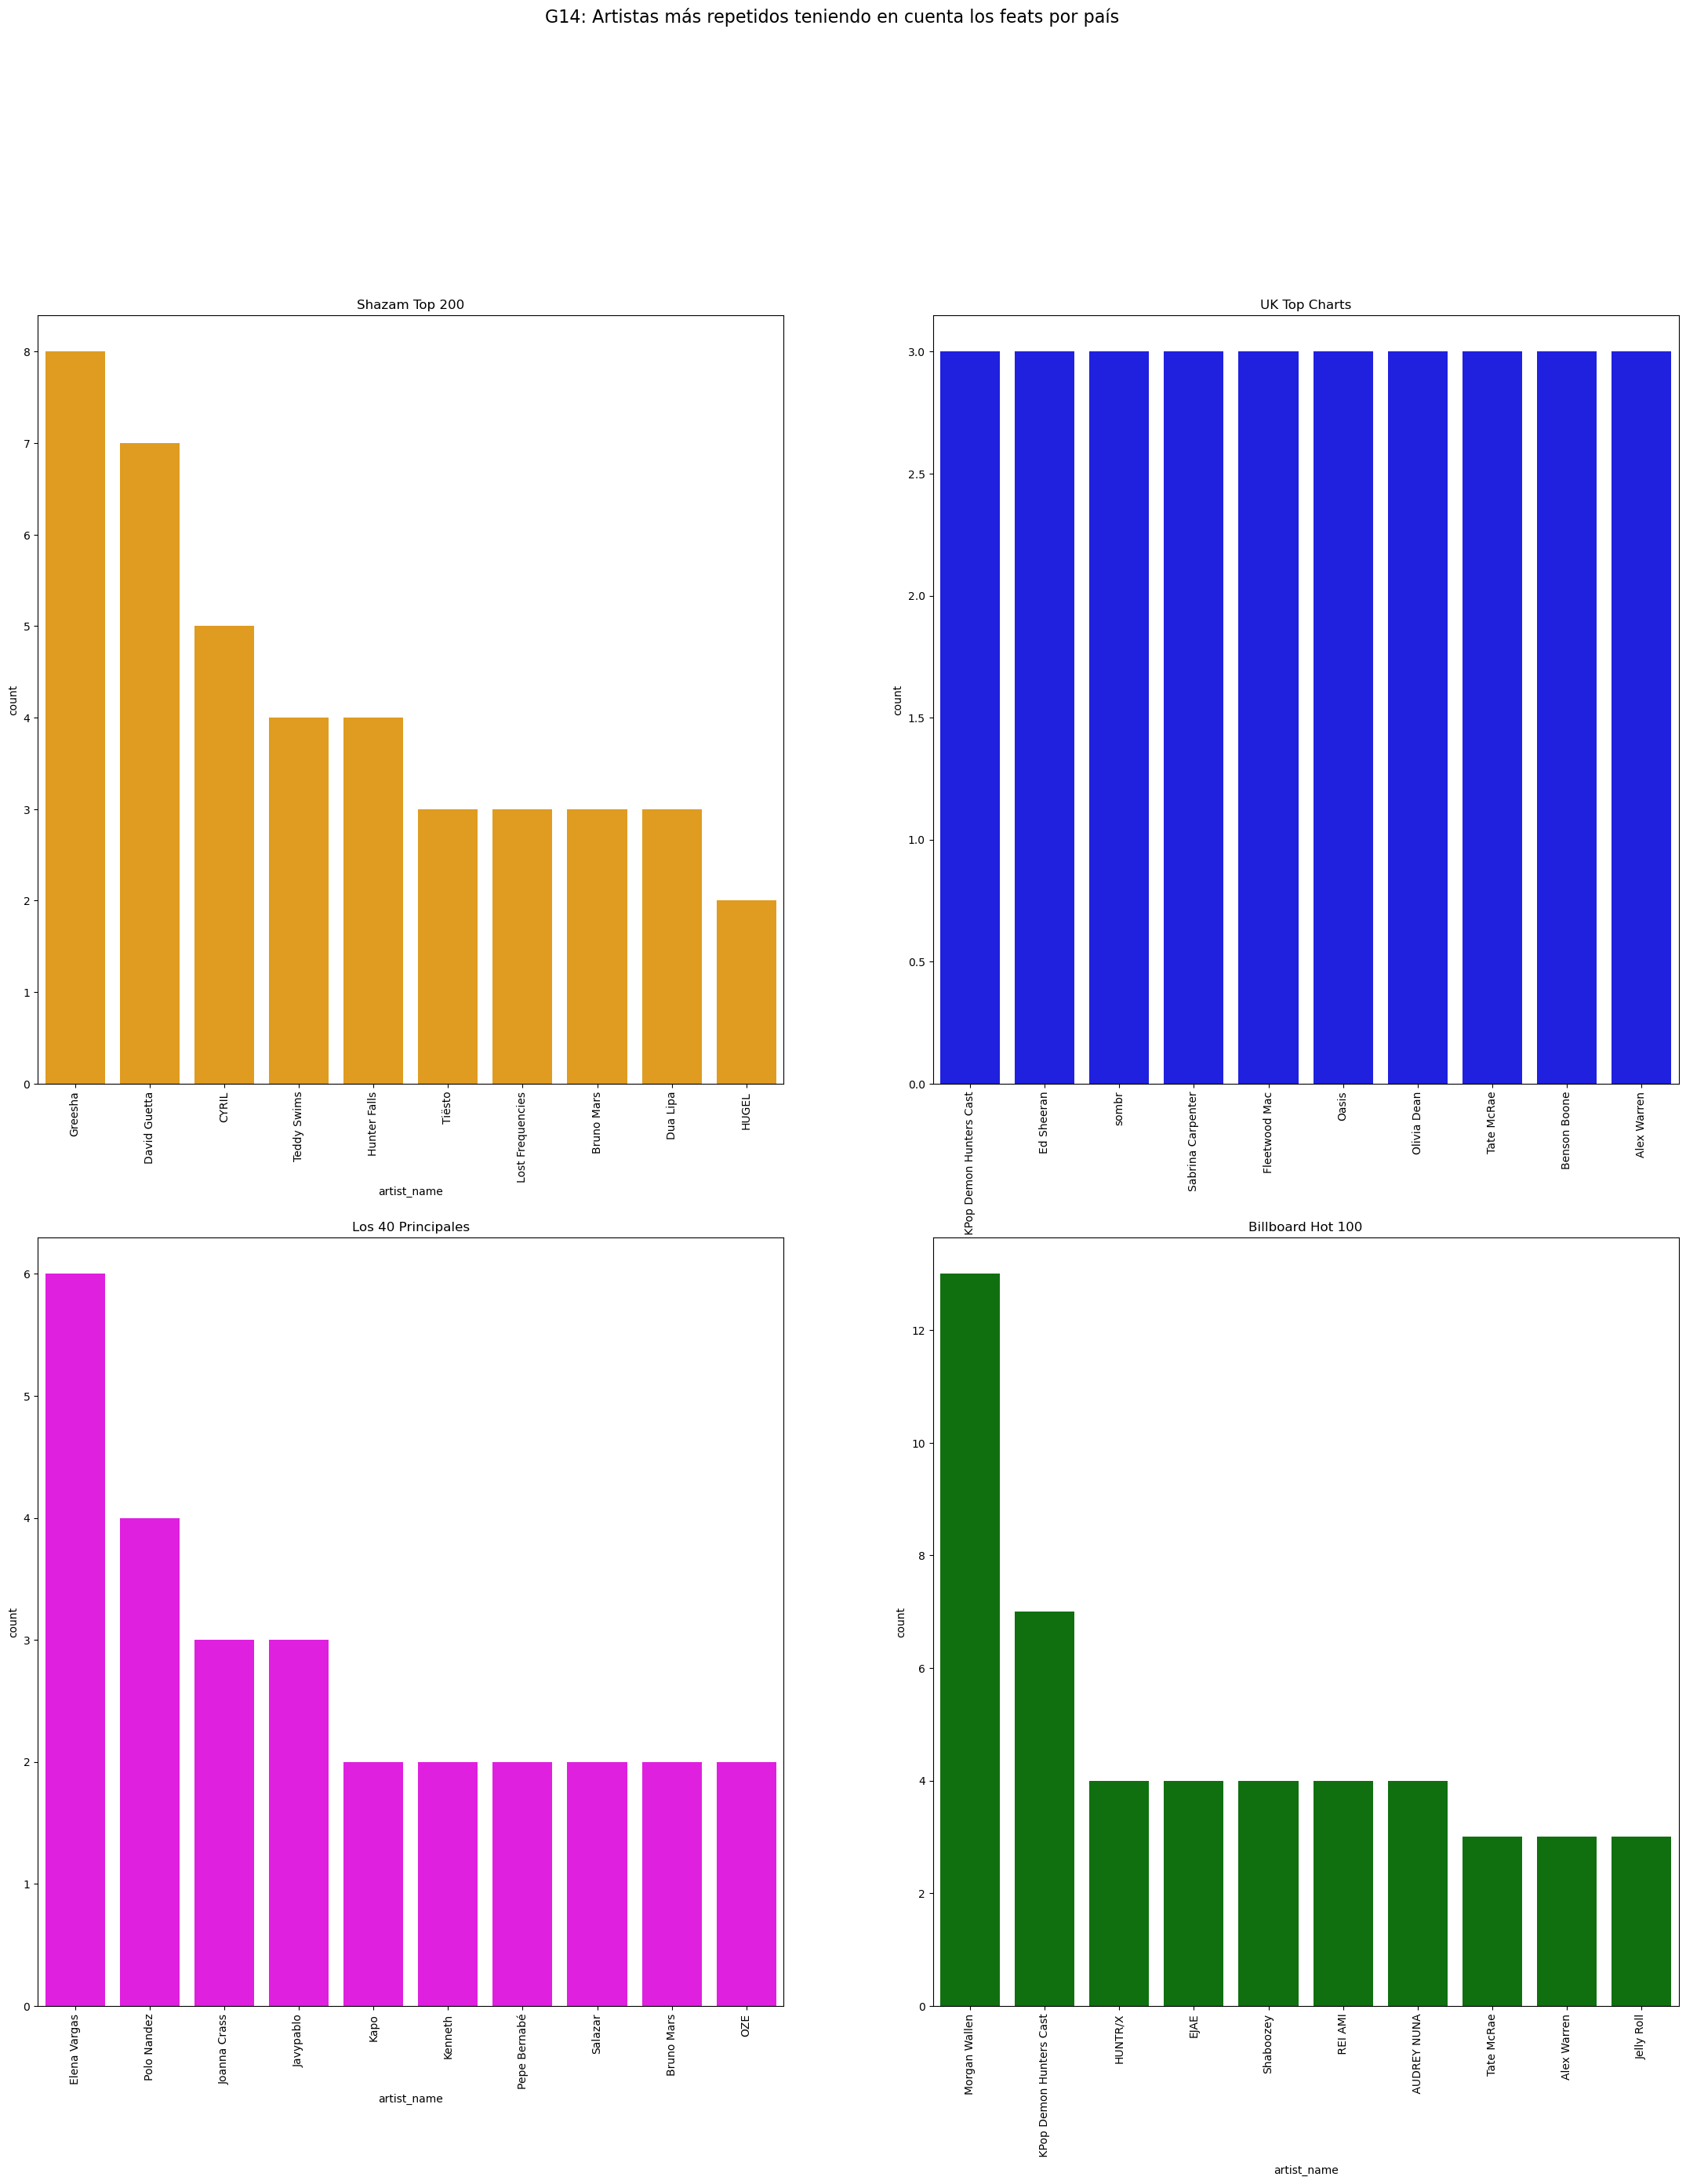

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (27, 28))
plt.suptitle("G14: Artistas más repetidos teniendo en cuenta los feats por país", fontsize=16, y=1.02)

#Hacemos un subplot para cada lista y extraemos los 10 artistas más repetidos en cada una
plt.subplot(2,2,3)
artistas_40=[]
for i in subset_40['artist_name']:
    artistas_40.append(i)
for i in subset_40[subset_40['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode(): #Tenemos en cuenta los artistas en colaboraciones 
    artistas_40.append(i)

#Countplot de las veces que aparece cada artista
df_artistas_40=pd.DataFrame()
df_artistas_40["artist_name"]=artistas_40
sns.countplot(data=df_artistas_40, x="artist_name", color="magenta", order=df_artistas_40["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Los 40 Principales")

plt.subplot(2,2,4)
artistas_BB=[]
for i in subset_BB['artist_name']:
    artistas_BB.append(i)
for i in subset_BB[subset_BB['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas_BB.append(i)

df_artistas_BB=pd.DataFrame()
df_artistas_BB["artist_name"]=artistas_BB
sns.countplot(data=df_artistas_BB, x="artist_name", color="green", order=df_artistas_BB["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Billboard Hot 100")

plt.subplot(2,2,1)
artistas_Sz=[]
for i in subset_Sz['artist_name']:
    artistas_Sz.append(i)
for i in subset_Sz[subset_Sz['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas_Sz.append(i)

df_artistas_Sz=pd.DataFrame()
df_artistas_Sz["artist_name"]=artistas_Sz
sns.countplot(data=df_artistas_Sz, x="artist_name", color="orange", order=df_artistas_Sz["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Shazam Top 200")

plt.subplot(2,2,2)
artistas_UK=[]
for i in subset_UK['artist_name']:
    artistas_UK.append(i)
for i in subset_UK[subset_UK['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas_UK.append(i)

df_artistas_UK=pd.DataFrame()
df_artistas_UK["artist_name"]=artistas_UK
sns.countplot(data=df_artistas_UK, x="artist_name", color="blue", order=df_artistas_UK["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("UK Top Charts")

plt.show()